# Diffusion Noise Process

In this Notebook, we visualize the noise operations of the diffusion process.

In [9]:
import torch
import numpy as np
from diffusion_breakdown.noise import Noise, LinearVarianceSchedule
import matplotlib.pyplot as plt

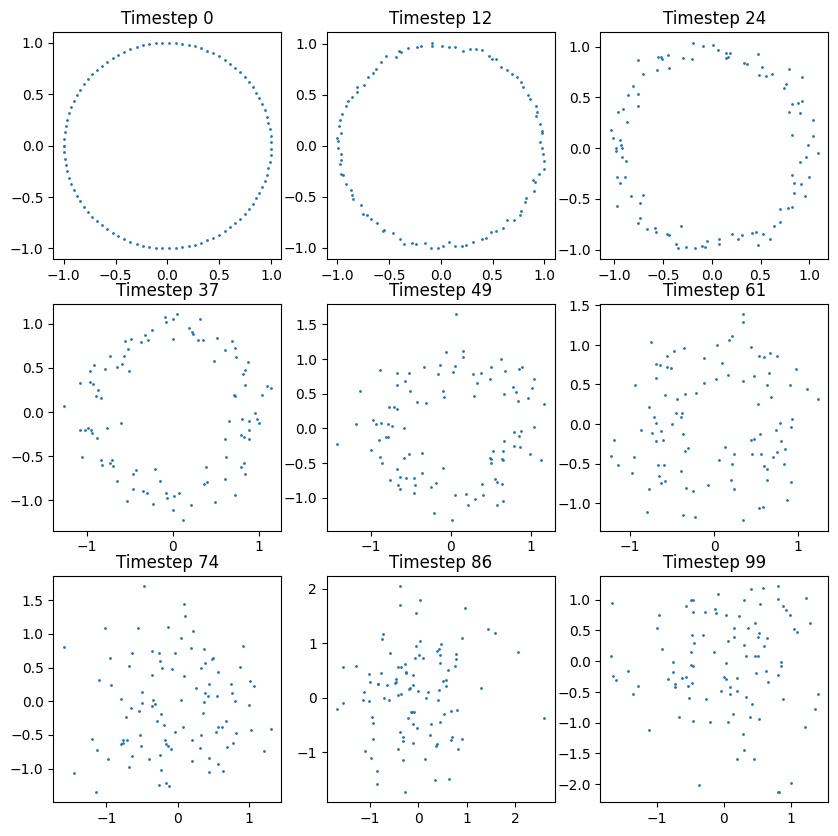

In [15]:
# Here we generate a circle and add noise to it at different timesteps of the diffusion process.

x = torch.stack([torch.cos(torch.linspace(-np.pi, np.pi, 100)), torch.sin(torch.linspace(-np.pi, np.pi, 100))])
timesteps = 100
variance_schedule = LinearVarianceSchedule(1e-4, 2e-2, timesteps)
noise = Noise(timesteps, variance_schedule)
y = noise.forward_diffusion(x, torch.arange(timesteps)).numpy()

fig, axs = plt.subplots(3, 3, figsize=(10, 10))

tss = np.linspace(0, 99, 9, dtype=int)

for i, ts in enumerate(tss):
    row = i // 3
    col = i % 3
    axs[row][col].scatter(y[ts, 0, :], y[ts, 1, :], s=1)
    axs[row][col].set_title(f"Timestep {ts}")
plt.show()


